# Analysis of the simulation of 40 items

The overarching goal is to find out how many persons are sufficient for estimating a sensible IRT model with 40 items. 


### Contents


* **[Data Preparation](#data_prep)**
* **[Alpha deviations](#alpha_dev)**
    * [Descriptive analyses](#alpha_dev_descriptive)
    * [Statistical tests and models](#alpha_dev_stats)
* **[Beta deviations](#beta_dev)**
    * [Descriptive analyses](#beta_dev_descriptive)
    * [Statistical tests and models](#beta_dev_stats)
* **[Theta deviations](#theta_dev)**
    * [Descriptive analyses](#theta_dev_descriptive)
    * [Statistical tests and models](#theta_dev_stats)
* **[Conclusions](#conclusions)**

In [28]:
library("tidyverse")
library("mgcv")

Loading required package: nlme


Attaching package: 'nlme'


The following object is masked from 'package:dplyr':

    collapse


This is mgcv 1.8-40. For overview type 'help("mgcv-package")'.



In [2]:
source("utils.R")

<a id='data_prep'></a>
## Data preparation

We want to analyze the results from the simulation with 40 items and a differing number of persons.

In [3]:
RESULT_FOLDER = "../results/sim_40_items_results/"

In [4]:
# read in data
results <- list.files(RESULT_FOLDER, "*.Rds")

In [5]:
alpha_results <- lapply(results, function(x) {
  r <- readRDS(paste0(RESULT_FOLDER, x))
  get_alpha_deviations(r)  # function from utils
})
alpha_results <- do.call(rbind, alpha_results)  # rbind all results into one big data frame.

In [6]:
beta_results <- lapply(results, function(x) {
  r <- readRDS(paste0(RESULT_FOLDER, x))
  get_beta_deviations(r)  # function from utils
})
beta_results <- do.call(rbind, beta_results)  # rbind all results into one big data frame.

In [7]:
theta_results <- lapply(results, function(x) {
  r <- readRDS(paste0(RESULT_FOLDER, x))
  get_theta_deviations(r)  # function from utils
})
theta_results <- do.call(rbind, theta_results)  # rbind all results into one big data frame.

In [8]:
head(alpha_results)

,discrimination_deviations,nr_persons,nr_items,nr_dimensions,model_type
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-0.1331983,200,40,1,2PL
2,-0.1049165,200,40,1,2PL
3,-0.8876888,200,40,1,2PL
4,-1.1285312,200,40,1,2PL
5,0.1062763,200,40,1,2PL
6,-0.4416468,200,40,1,2PL


In [9]:
summary(alpha_results)

 discrimination_deviations   nr_persons     nr_items  nr_dimensions 
 Min.   :-5.08906          Min.   :200   Min.   :40   Min.   :1.00  
 1st Qu.:-0.27584          1st Qu.:200   1st Qu.:40   1st Qu.:2.50  
 Median :-0.04448          Median :250   Median :40   Median :3.50  
 Mean   :-0.06724          Mean   :250   Mean   :40   Mean   :3.25  
 3rd Qu.: 0.15731          3rd Qu.:300   3rd Qu.:40   3rd Qu.:4.25  
 Max.   : 5.96794          Max.   :300   Max.   :40   Max.   :5.00  
  model_type       
 Length:32000      
 Class :character  
 Mode  :character  
                   
                   
                   

In [10]:
dim(alpha_results)

[1] 32000     5

In [11]:
head(beta_results)

,difficulty_deviations,nr_persons,nr_items,nr_dimensions,model_type
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-0.32461050,200,40,1,2PL
2,0.02552953,200,40,1,2PL
3,-0.28619402,200,40,1,2PL
4,0.16335440,200,40,1,2PL
5,-0.12305305,200,40,1,2PL
6,-0.08130934,200,40,1,2PL


In [12]:
dim(beta_results)

[1] 32000     5

In [13]:
head(theta_results)

,theta_deviations,nr_persons,nr_items,nr_dimensions,model_type
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0.05039965,200,40,1,2PL
2,0.08075449,200,40,1,2PL
3,0.22118972,200,40,1,2PL
4,0.03601423,200,40,1,2PL
5,0.11266306,200,40,1,2PL
6,-0.48067561,200,40,1,2PL


In [14]:
dim(theta_results)

[1] 200000      5

[**back to contents**](#contents)

<a id='alpha_dev'></a>
## Alpha deviations

<a id='alpha_dev_descriptive'></a>
### Descriptive analyses

In [26]:
alpha_results %>%
  group_by(nr_persons, nr_items) %>%
  summarise(
    alpha_deviations = mean(discrimination_deviations),
    alpha_deviations_se = se(discrimination_deviations),
    aplha_deviations_sd = sd(discrimination_deviations)
  )

`summarise()` has grouped output by 'nr_persons'. You can override using the `.groups` argument.


nr_persons,nr_items,alpha_deviations,alpha_deviations_se,aplha_deviations_sd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
200,40,-0.07313025,0.004124274,0.5216840
300,40,-0.06134799,0.003456434,0.4372082


In [16]:
alpha_results %>%
  group_by(nr_persons, nr_items, nr_dimensions) %>%
  summarise(
    alpha_deviations = mean(discrimination_deviations),
    alpha_deviations_se = se(discrimination_deviations)
  ) %>% 
  round(5)

`summarise()` has grouped output by 'nr_persons', 'nr_items'. You can override using the `.groups` argument.


nr_persons,nr_items,nr_dimensions,alpha_deviations,alpha_deviations_se
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
200,40,1,-0.08191,0.00667
200,40,3,-0.06805,0.00824
200,40,4,-0.06945,0.00889
200,40,5,-0.07310,0.00899
300,40,1,-0.08057,0.00569
300,40,3,-0.03260,0.00728
300,40,4,-0.07464,0.00711
300,40,5,-0.05759,0.00741


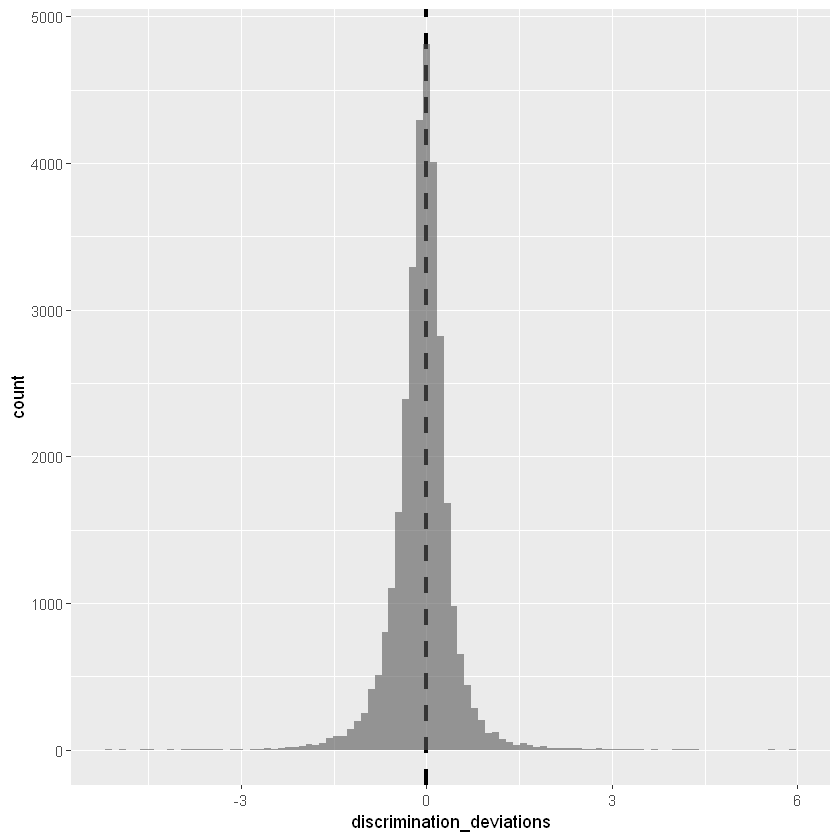

In [38]:
alpha_results %>%
    ggplot(aes(x=discrimination_deviations)) + 
        geom_vline(xintercept=0, linetype="dashed", size=1.2) +
        geom_histogram(bins=100, alpha=.6) 

There is no highly visible skew; the errors seem to be more or less normally distributed around the true value

In [42]:
skewness(alpha_results$discrimination_deviations)
kurtosis(alpha_results$discrimination_deviations)

[1] -0.09470225

[1] 13.40583

Small skew to the left; more values in the tails than under normal assumption.

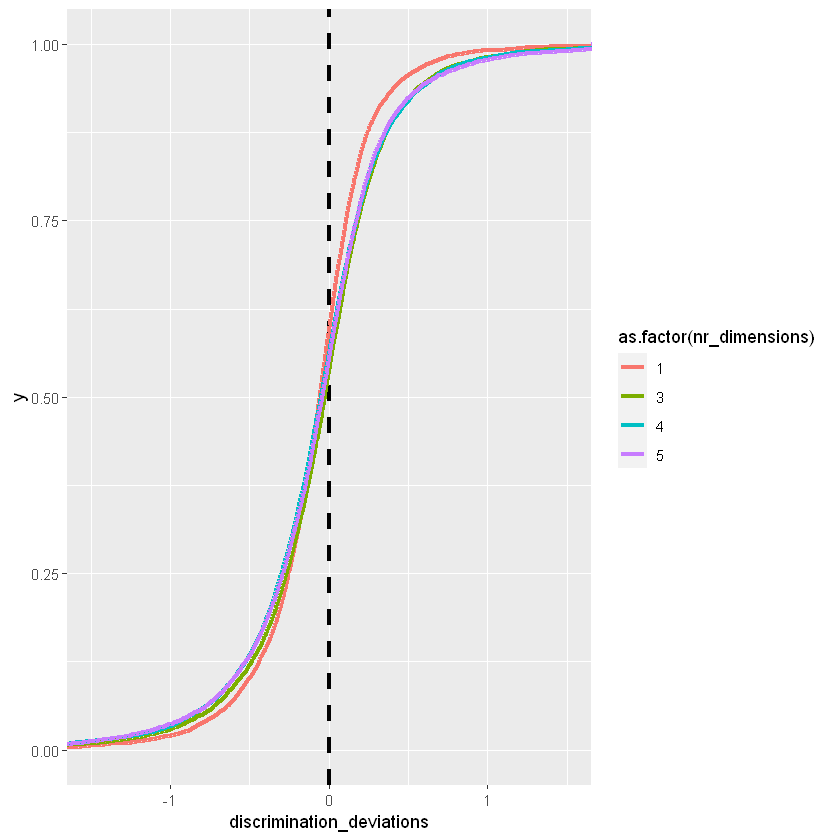

In [47]:
# Distribution
alpha_results %>%
    ggplot(aes(x=discrimination_deviations, col=as.factor(nr_dimensions))) + 
        geom_vline(xintercept=0, linetype="dashed", size=1.2) +
        stat_ecdf(size=1.2) +
        coord_cartesian(xlim=c(-1.5, 1.5))

It looks like that more dimensions lead to more values that are a little further off from the actual value.

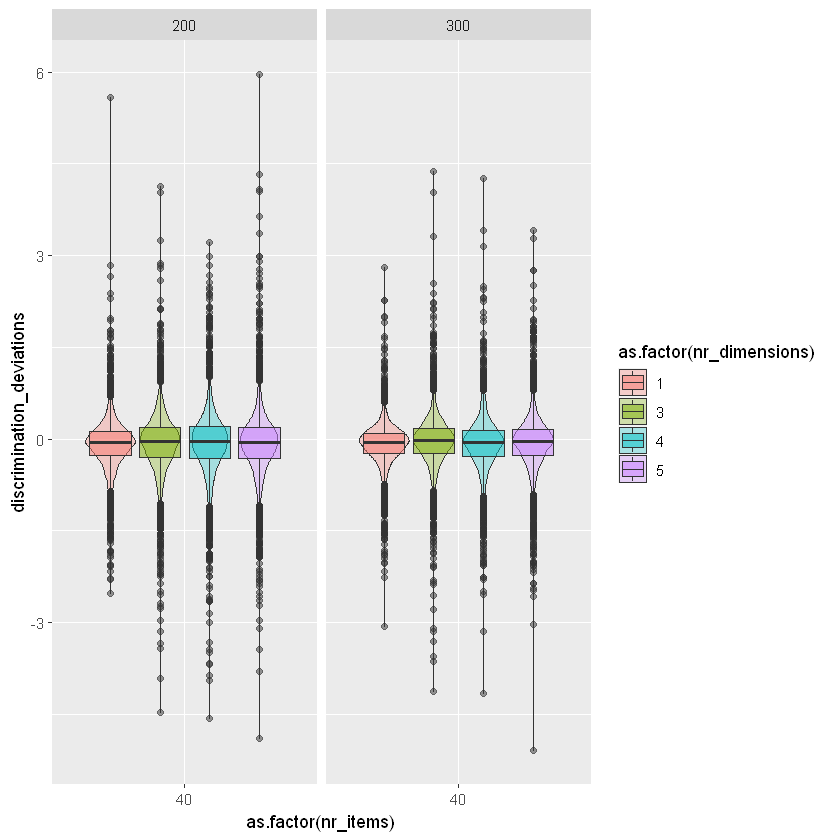

In [176]:
# Mean and SE
alpha_results %>%
  ggplot(aes(x=as.factor(nr_items), y=discrimination_deviations, fill=as.factor(nr_dimensions))) +
    geom_violin(alpha=.3) +
    geom_boxplot(alpha=.5, position = position_dodge(.9)) +
    facet_wrap(~as.factor(nr_persons))

`summarise()` has grouped output by 'nr_persons', 'nr_items'. You can override using the `.groups` argument.


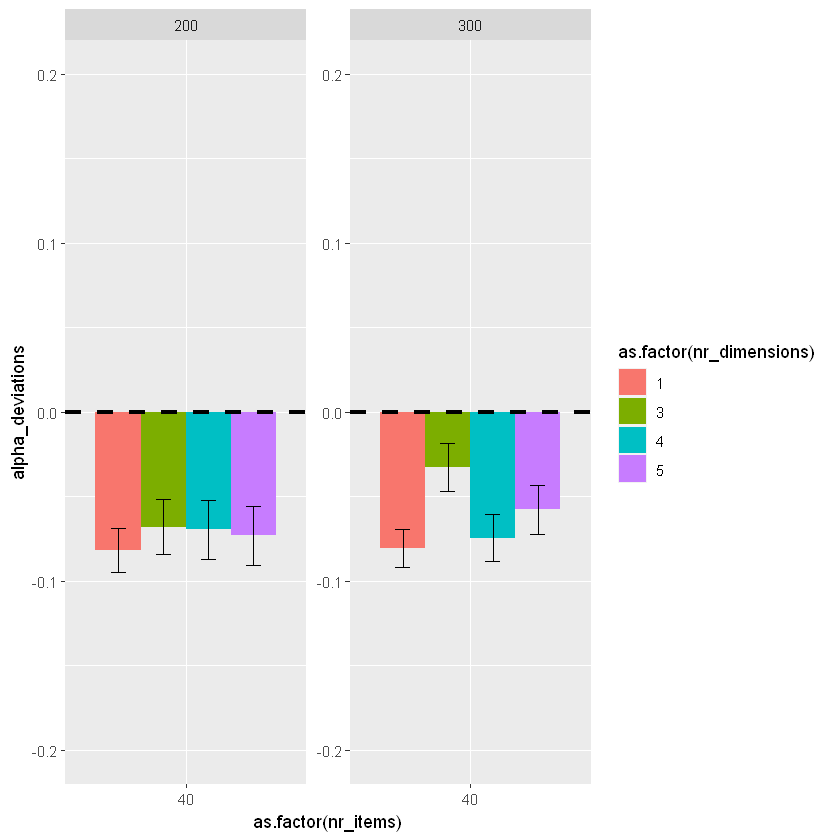

In [17]:
# Mean and SE
alpha_results %>%
  group_by(nr_persons, nr_items, nr_dimensions) %>%
  summarise(
    alpha_deviations = mean(discrimination_deviations),
    alpha_deviations_se = se(discrimination_deviations)
  ) %>% 
  ggplot(aes(x=as.factor(nr_items), y=alpha_deviations, fill=as.factor(nr_dimensions))) +
    geom_bar(stat="identity", position = position_dodge()) +
    facet_wrap(~as.factor(nr_persons), scales="free") +
    geom_errorbar(
        aes(
            x=as.factor(nr_items), 
            ymin=alpha_deviations - 1.96 * alpha_deviations_se, 
            ymax=alpha_deviations + 1.96 * alpha_deviations_se
        ), 
        width=.3,
        position=position_dodge(.9)
    ) +
    geom_hline(yintercept=0, linetype="dashed", size=1.2) +
    coord_cartesian(ylim=c(-.2, .2))

[**back to contents**](#contents)

<a id='alpha_dev_stats'></a>
### Statistical analyses

**Do 200 vs. 300 people make a difference?**

In [18]:
# Does it make a difference whether we use 200 or 300 people?
t.test(
    alpha_results %>% filter(nr_persons == 200) %>% select(discrimination_deviations),
    alpha_results %>% filter(nr_persons == 300) %>% select(discrimination_deviations),
)


	Welch Two Sample t-test

data:  alpha_results %>% filter(nr_persons == 200) %>% select(discrimination_deviations) and alpha_results %>% filter(nr_persons == 300) %>% select(discrimination_deviations)
t = -2.1896, df = 31049, p-value = 0.02856
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.022329499 -0.001235029
sample estimates:
  mean of x   mean of y 
-0.07313025 -0.06134799 


In [24]:
var.test(
    alpha_results %>% filter(nr_persons == 200) %>% pull(discrimination_deviations),
    alpha_results %>% filter(nr_persons == 300) %>% pull(discrimination_deviations)
)


	F test to compare two variances

data:  alpha_results %>% filter(nr_persons == 200) %>% pull(discrimination_deviations) and alpha_results %>% filter(nr_persons == 300) %>% pull(discrimination_deviations)
F = 1.4238, num df = 15999, denom df = 15999, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.380317 1.468581
sample estimates:
ratio of variances 
          1.423765 


We see that 
* the estimations are a little less biased (statistically significant, but not a huge effect) for 300 people
* the estimations are more closely centered for 300 people, i.e. they have less variance around the true value

In [50]:
head(alpha_results)

,discrimination_deviations,nr_persons,nr_items,nr_dimensions,model_type
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-0.1331983,200,40,1,2PL
2,-0.1049165,200,40,1,2PL
3,-0.8876888,200,40,1,2PL
4,-1.1285312,200,40,1,2PL
5,0.1062763,200,40,1,2PL
6,-0.4416468,200,40,1,2PL


**Does the interaction of number of persons and number of dimensions make a difference?**

In [68]:
remove_outliers <- function(
    data,
    columns_to_exclude_outliers_for,
    quant = .01
) {
    for (col in columns_to_exclude_outliers_for) {
        lower_quantile <- quantile(data[,col], quant, na.rm=TRUE)
        upper_quantile <- quantile(data[,col], 1-quant, na.rm=TRUE)
        cols_to_keep <- (
            (data[col] >= lower_quantile) &
            (data[col] <= upper_quantile)
        )
        cols_to_keep[is.na(cols_to_keep)] = TRUE
        data <- data[cols_to_keep,]
    }
    return(data)
}

In [70]:
alpha_results_without_outliers <- remove_outliers(alpha_results, "discrimination_deviations", .01)

In [86]:
m0 <- lm(
    discrimination_deviations ~
    as.factor(nr_persons) * nr_dimensions, 
    alpha_results_without_outliers
)

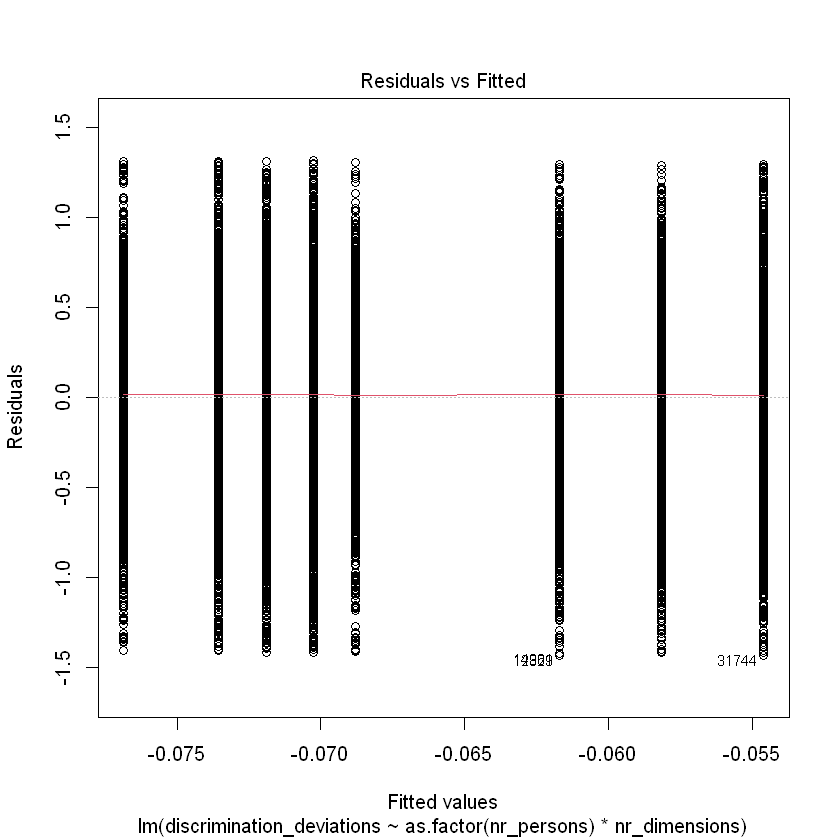

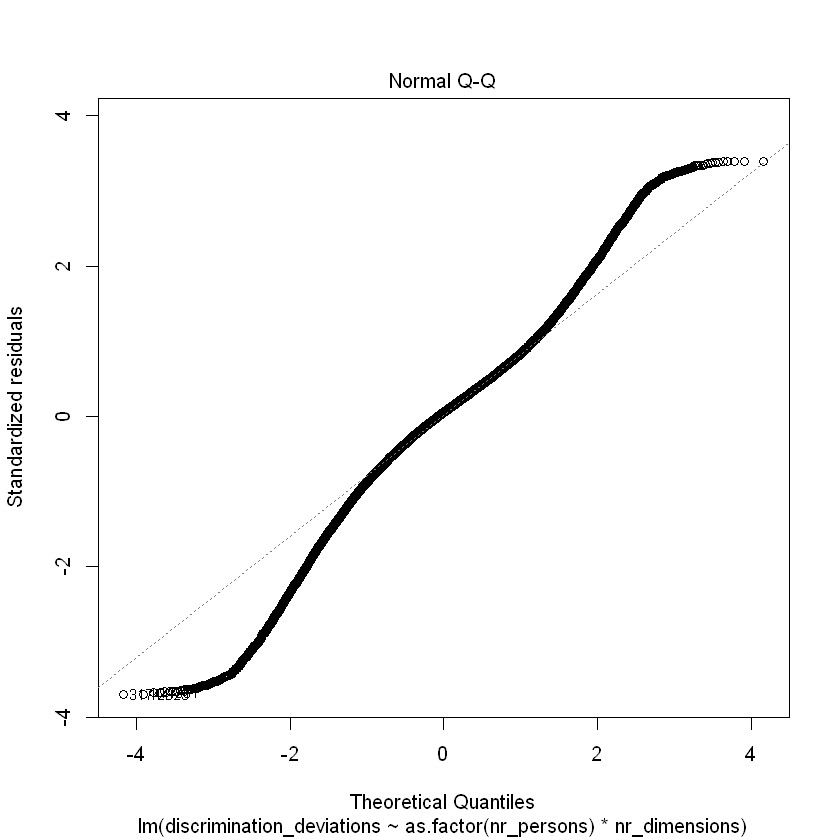

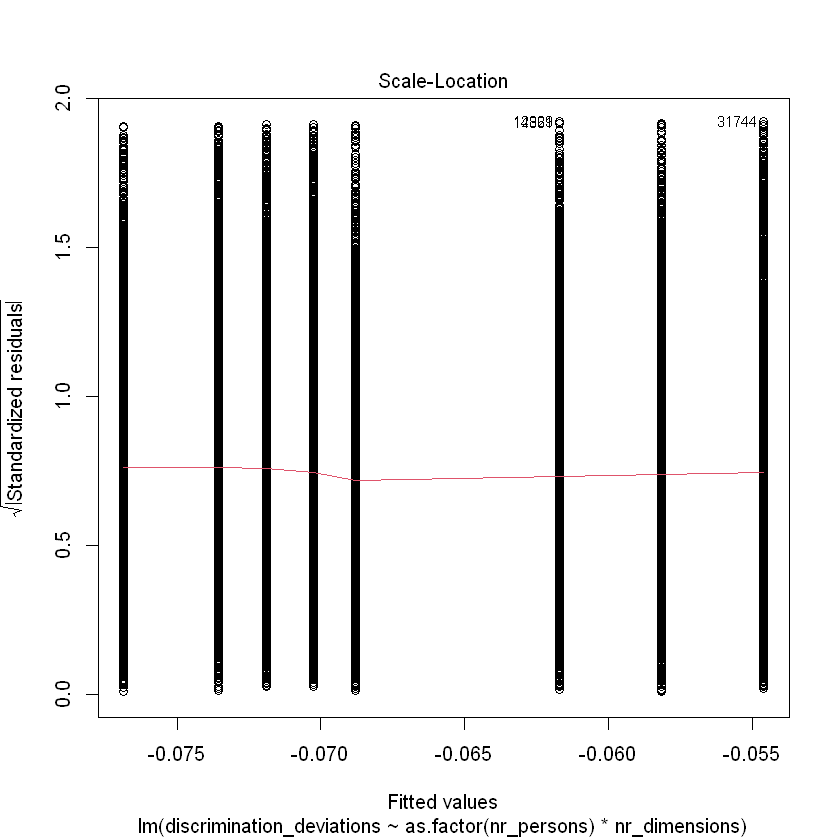

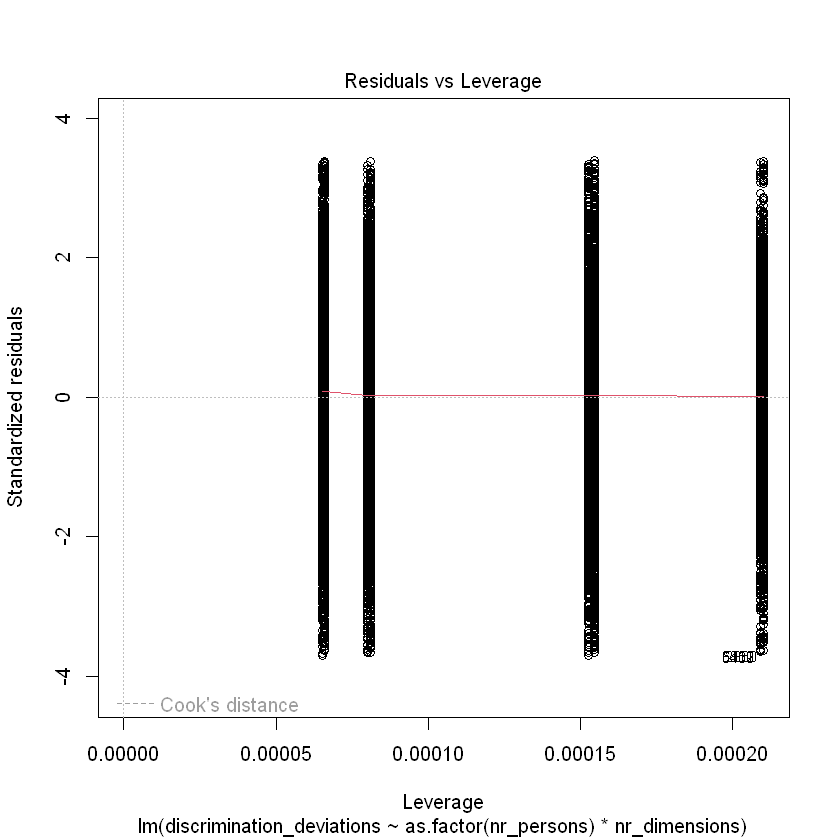

In [87]:
plot(m0)

In [88]:
summary(m0)


Call:
lm(formula = discrimination_deviations ~ as.factor(nr_persons) * 
    nr_dimensions, data = alpha_results_without_outliers)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.42995 -0.20280  0.02216  0.21825  1.31211 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            -0.078501   0.007439 -10.552   <2e-16
as.factor(nr_persons)300                0.006150   0.010507   0.585    0.558
nr_dimensions                           0.001650   0.002089   0.790    0.430
as.factor(nr_persons)300:nr_dimensions  0.001903   0.002948   0.645    0.519
                                          
(Intercept)                            ***
as.factor(nr_persons)300                  
nr_dimensions                             
as.factor(nr_persons)300:nr_dimensions    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3867 on 31356 degrees of freedom
Multiple R-squared:  0

We see the following:
* Since the intercept is negative, a positive coefficient corresponds to an improvement in estimation accuracy
* There are no significant improvements of the accuracy for more persons.

However, the model should not be trusted blindly, it is not particularly good.

In [99]:
m1 <- mgcv::gam(
    discrimination_deviations ~
    s(nr_dimensions, by=nr_persons, k=4), 
    data=alpha_results_without_outliers
)


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 7 iterations.
The RMS GCV score gradient at convergence was 2.718916e-07 .
The Hessian was positive definite.
Model rank =  5 / 5 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                              k'  edf k-index p-value
s(nr_dimensions):nr_persons 4.00 3.87    0.99    0.28


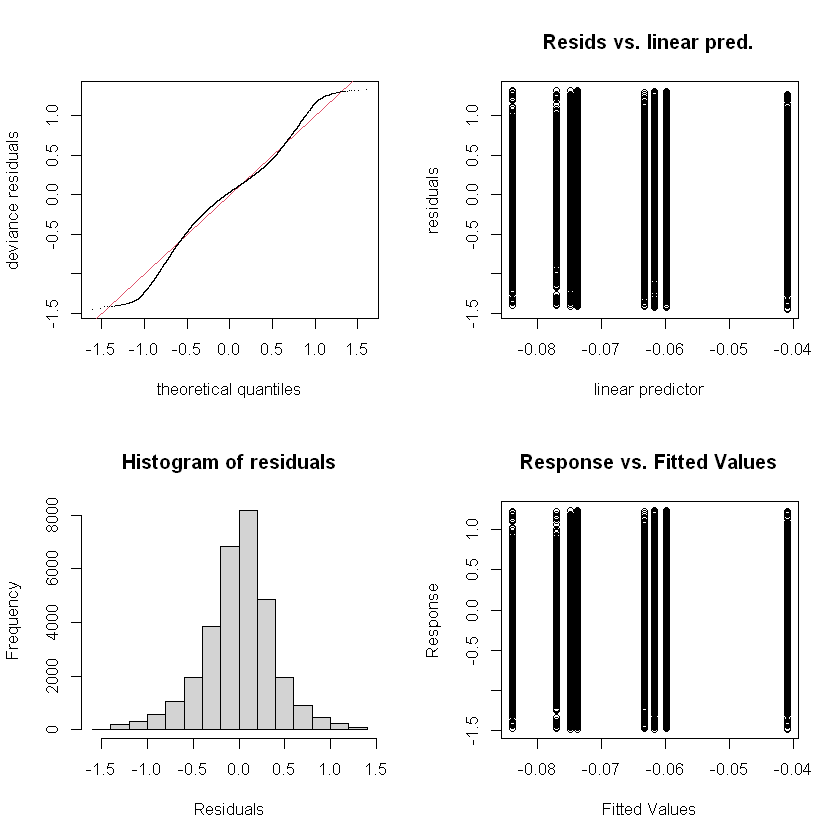

In [100]:
gam.check(m1)

In [101]:
summary(m1)


Family: gaussian 
Link function: identity 

Formula:
discrimination_deviations ~ s(nr_dimensions, by = nr_persons, 
    k = 4)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.09783    0.01114  -8.781   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                              edf Ref.df     F  p-value    
s(nr_dimensions):nr_persons 3.873  3.986 8.124 6.73e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.00101   Deviance explained = 0.113%
GCV = 0.14943  Scale est. = 0.14941   n = 31360

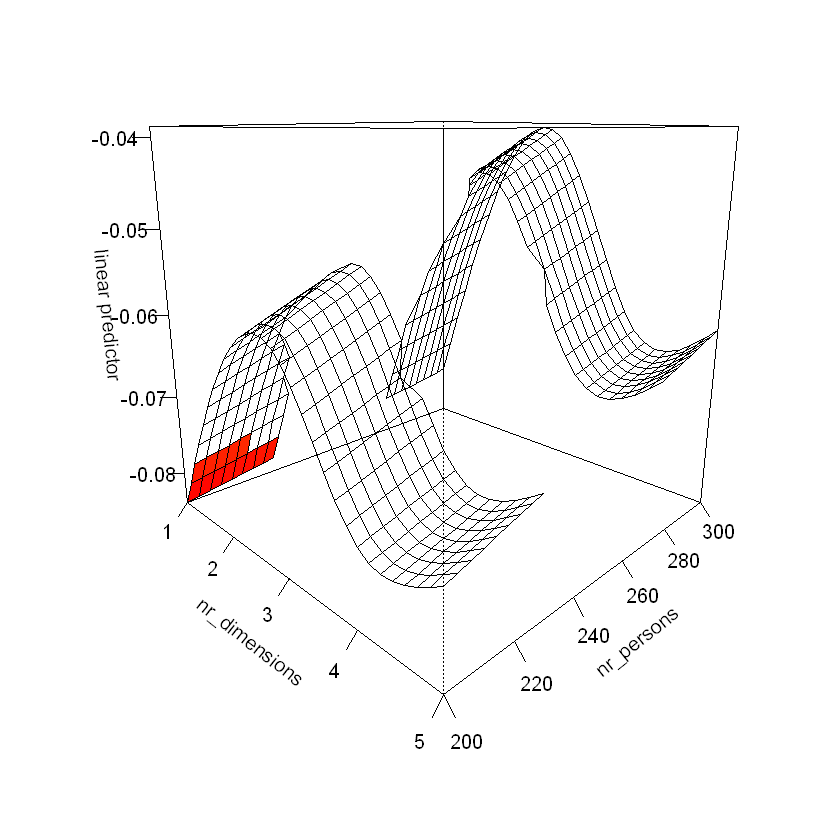

In [110]:
vis.gam(m1, theta=45, too.far = .3, ticktype="detailed")

The GAM predicts more or less the same as the linear model: The number of persons has a positive, yet not incredibly big effect.

[**back to contents**](#contents)

<a id='beta_dev'></a>
### Beta deviations

<a id='beta_dev_descriptive'></a>
### Descriptive analyses

In [111]:
beta_results %>%
  group_by(nr_persons, nr_items) %>%
  summarise(
    alpha_deviations = mean(difficulty_deviations),
    alpha_deviations_se = se(difficulty_deviations),
    aplha_deviations_sd = sd(difficulty_deviations)
  )

`summarise()` has grouped output by 'nr_persons'. You can override using the `.groups` argument.


nr_persons,nr_items,alpha_deviations,alpha_deviations_se,aplha_deviations_sd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
200,40,0.001886061,0.002857116,0.3613997
300,40,0.006401675,0.002308764,0.2920381


In [112]:
beta_results %>%
  group_by(nr_persons, nr_items, nr_dimensions) %>%
  summarise(
    alpha_deviations = mean(difficulty_deviations),
    alpha_deviations_se = se(difficulty_deviations),
    aplha_deviations_sd = sd(difficulty_deviations)
  )

`summarise()` has grouped output by 'nr_persons', 'nr_items'. You can override using the `.groups` argument.


nr_persons,nr_items,nr_dimensions,alpha_deviations,alpha_deviations_se,aplha_deviations_sd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
200,40,1,0.017149722,0.004538465,0.2870377
200,40,3,0.021607547,0.005656081,0.3577220
200,40,4,0.003901083,0.006266962,0.3963575
200,40,5,-0.035114107,0.006186410,0.3912629
300,40,1,0.017397893,0.003617167,0.2287697
300,40,3,0.003138876,0.004803221,0.3037823
300,40,4,0.019320603,0.004684653,0.2962835
300,40,5,-0.014250671,0.005198093,0.3287563


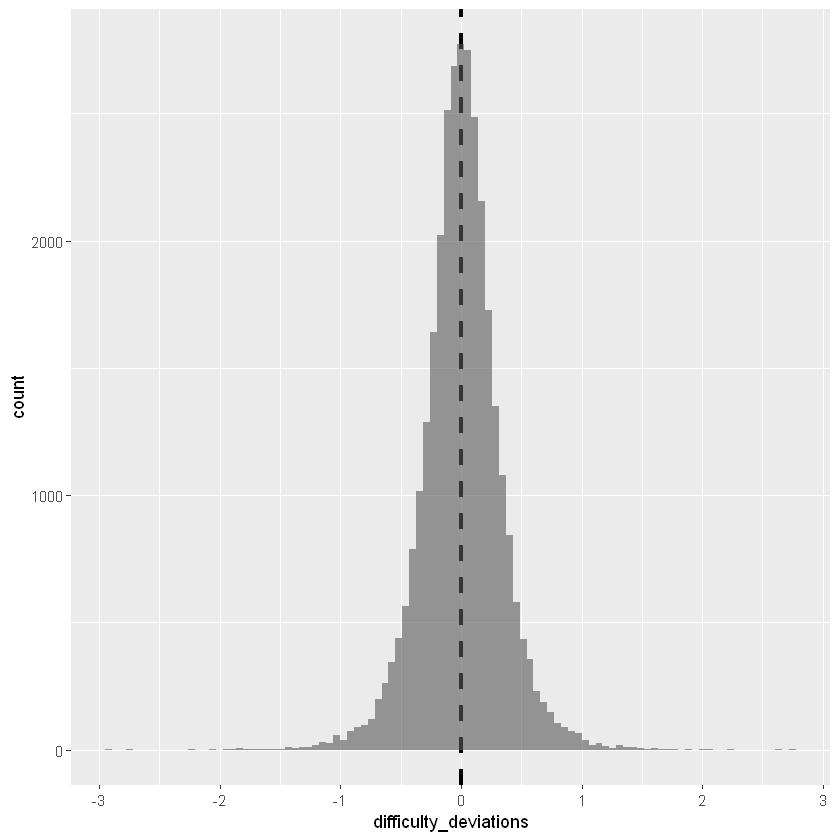

In [113]:
beta_results %>%
    ggplot(aes(x=difficulty_deviations)) + 
        geom_vline(xintercept=0, linetype="dashed", size=1.2) +
        geom_histogram(bins=100, alpha=.6) 

There is no highly visible skew; the errors seem to be more or less normally distributed around the true value

In [115]:
skewness(beta_results$difficulty_deviations)
kurtosis(beta_results$difficulty_deviations)

[1] -0.01951812

[1] 6.210017

Small skew to the left; more values in the tails than under normal assumption.

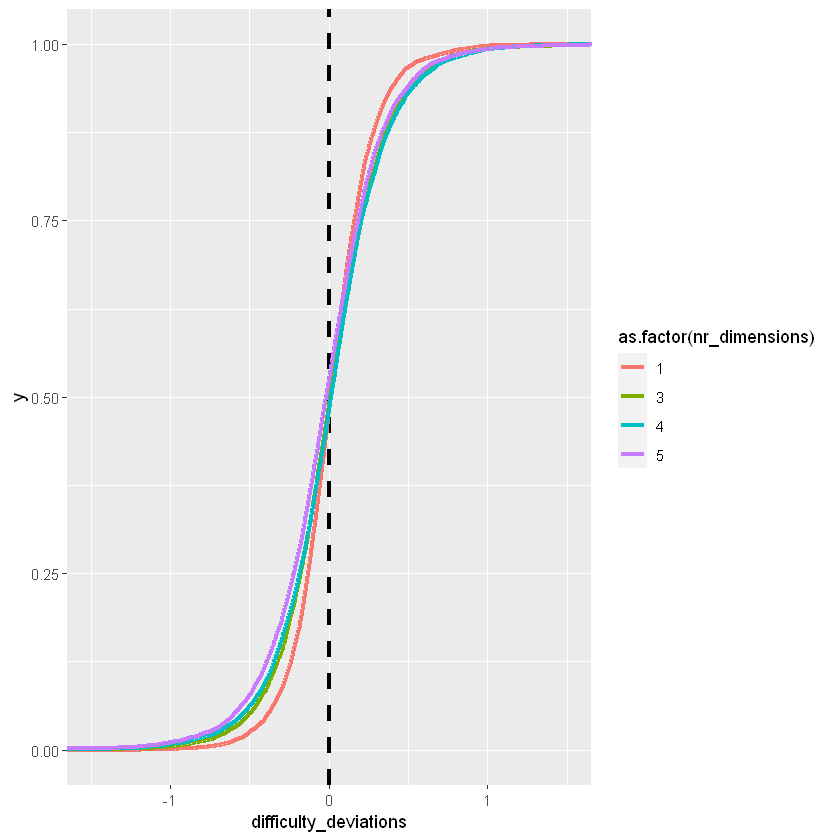

In [116]:
# Distribution
beta_results %>%
    ggplot(aes(x=difficulty_deviations, col=as.factor(nr_dimensions))) + 
        geom_vline(xintercept=0, linetype="dashed", size=1.2) +
        stat_ecdf(size=1.2) +
        coord_cartesian(xlim=c(-1.5, 1.5))

More dimensions lead to a little more deviations here as well.

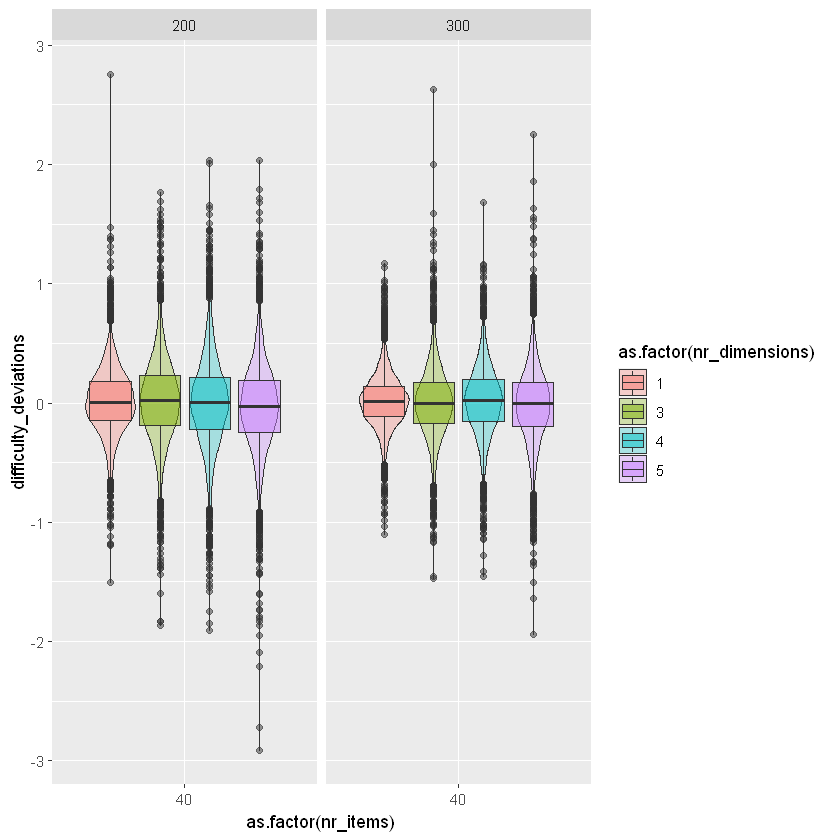

In [175]:
# Mean and SE
beta_results %>%
  ggplot(aes(x=as.factor(nr_items), y=difficulty_deviations, fill=as.factor(nr_dimensions))) +
    geom_violin(alpha=.3) +
    geom_boxplot(alpha=.5, position = position_dodge(.9)) +
        facet_wrap(~as.factor(nr_persons))

`summarise()` has grouped output by 'nr_persons', 'nr_items'. You can override using the `.groups` argument.


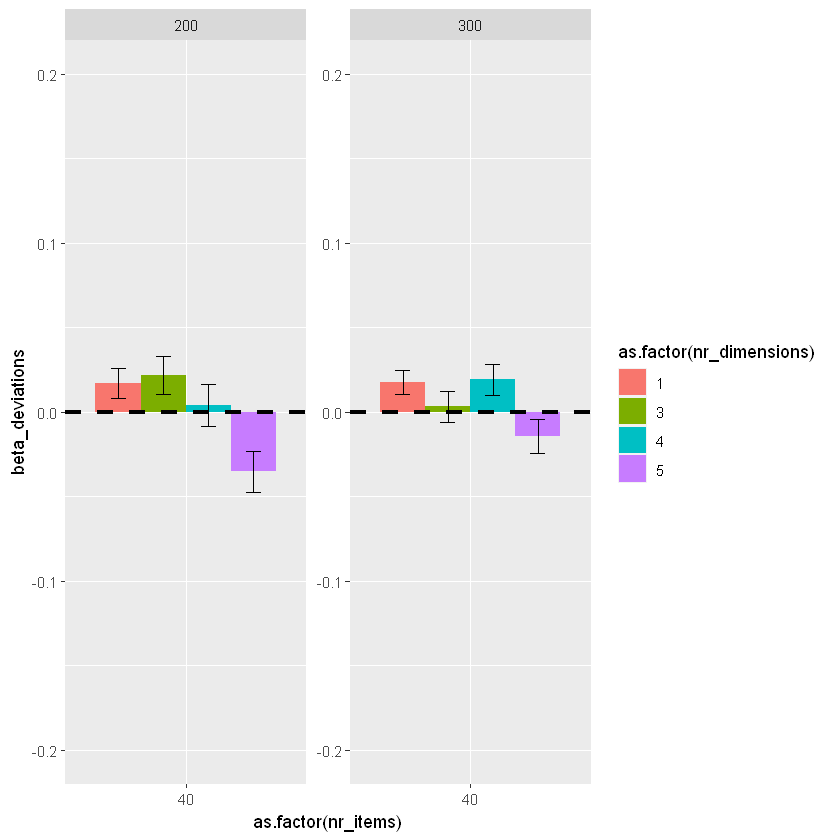

In [120]:
# Mean and SE
beta_results %>%
  group_by(nr_persons, nr_items, nr_dimensions) %>%
  summarise(
    beta_deviations = mean(difficulty_deviations),
    beta_deviations_se = se(difficulty_deviations)
  ) %>% 
  ggplot(aes(x=as.factor(nr_items), y=beta_deviations, fill=as.factor(nr_dimensions))) +
    geom_bar(stat="identity", position = position_dodge()) +
    facet_wrap(~as.factor(nr_persons), scales="free") +
    geom_errorbar(
        aes(
            x=as.factor(nr_items), 
            ymin=beta_deviations - 1.96 * beta_deviations_se, 
            ymax=beta_deviations + 1.96 * beta_deviations_se
        ), 
        width=.3,
        position=position_dodge(.9)
    ) +
    geom_hline(yintercept=0, linetype="dashed", size=1.2) +
    coord_cartesian(ylim=c(-.2, .2))

[**back to contents**](#contents)

<a id='beta_dev_stats'></a>
### Statistical analyses

**Do 200 vs. 300 people make a difference?**

In [121]:
# Does it make a difference whether we use 200 or 300 people?
t.test(
    beta_results %>% filter(nr_persons == 200) %>% select(difficulty_deviations),
    beta_results %>% filter(nr_persons == 300) %>% select(difficulty_deviations),
)


	Welch Two Sample t-test

data:  beta_results %>% filter(nr_persons == 200) %>% select(difficulty_deviations) and beta_results %>% filter(nr_persons == 300) %>% select(difficulty_deviations)
t = -1.2293, df = 30647, p-value = 0.219
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.011715532  0.002684304
sample estimates:
  mean of x   mean of y 
0.001886061 0.006401675 


In [122]:
var.test(
    beta_results %>% filter(nr_persons == 200) %>% pull(difficulty_deviations),
    beta_results %>% filter(nr_persons == 300) %>% pull(difficulty_deviations),
)


	F test to compare two variances

data:  beta_results %>% filter(nr_persons == 200) %>% pull(difficulty_deviations) and beta_results %>% filter(nr_persons == 300) %>% pull(difficulty_deviations)
F = 1.5314, num df = 15999, denom df = 15999, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.484694 1.579633
sample estimates:
ratio of variances 
          1.531428 


We see that 
* the estimates are not less biased (not statistically significant)
* the estimations are more closely centered for 300 people, i.e. they have less variance around the true value

**Does the interaction of number of persons and number of dimensions make a difference?**

In [124]:
beta_results_without_outliers <- remove_outliers(beta_results, "difficulty_deviations", .01)

In [125]:
m0 <- lm(
    difficulty_deviations ~
    as.factor(nr_persons) * nr_dimensions, 
    beta_results_without_outliers
)

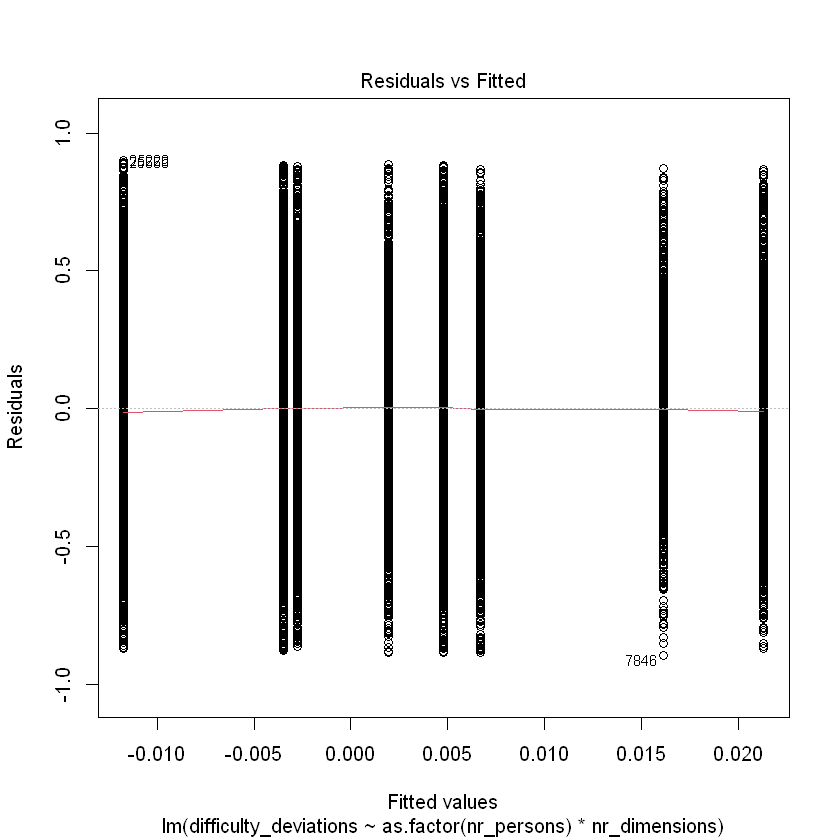

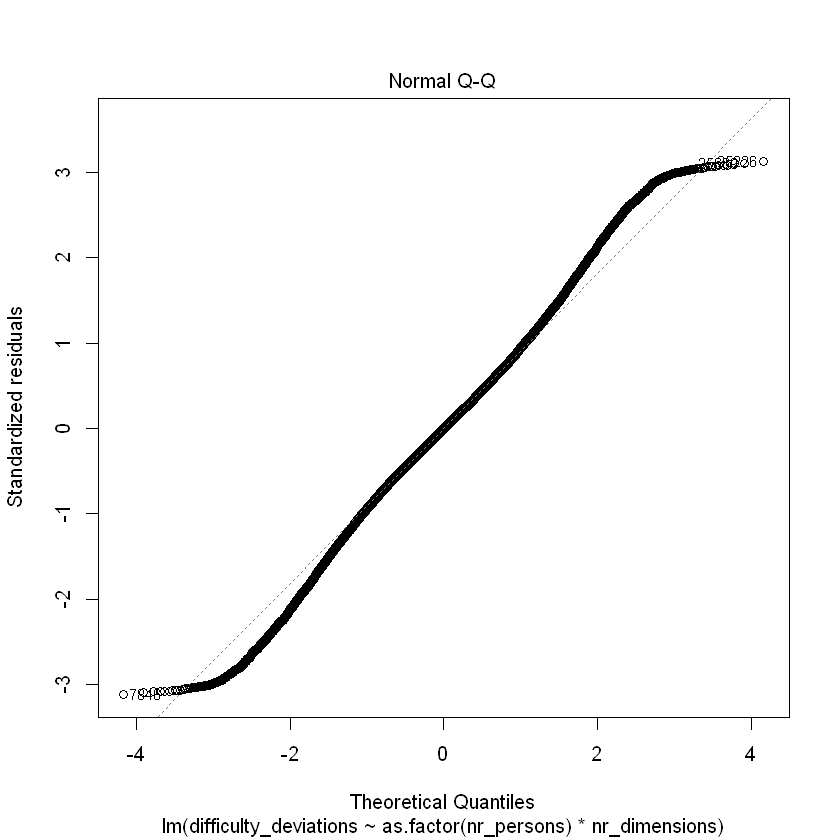

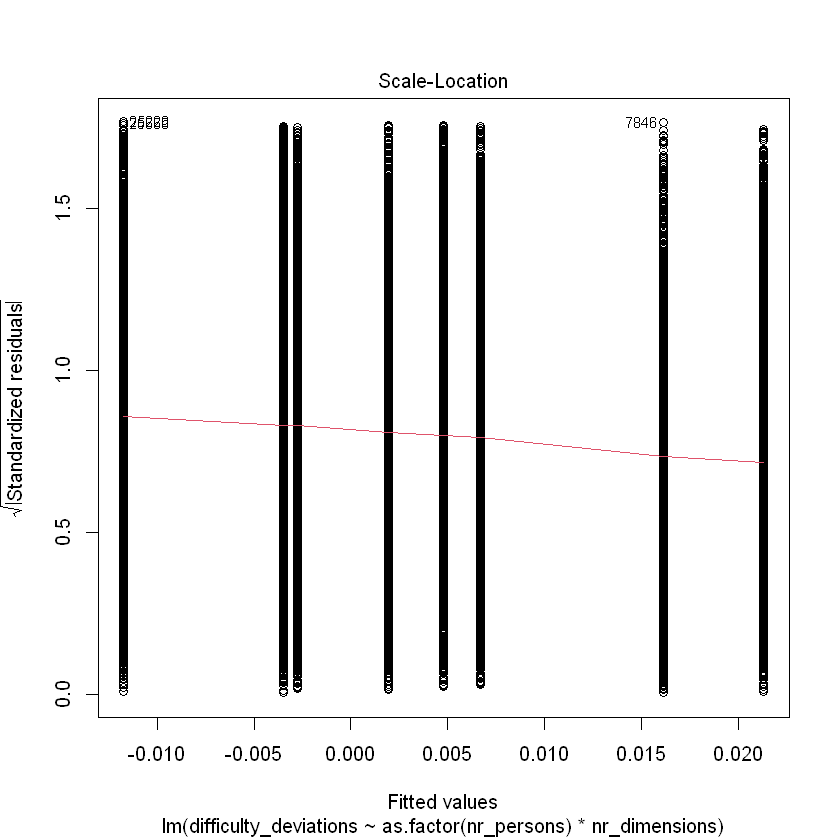

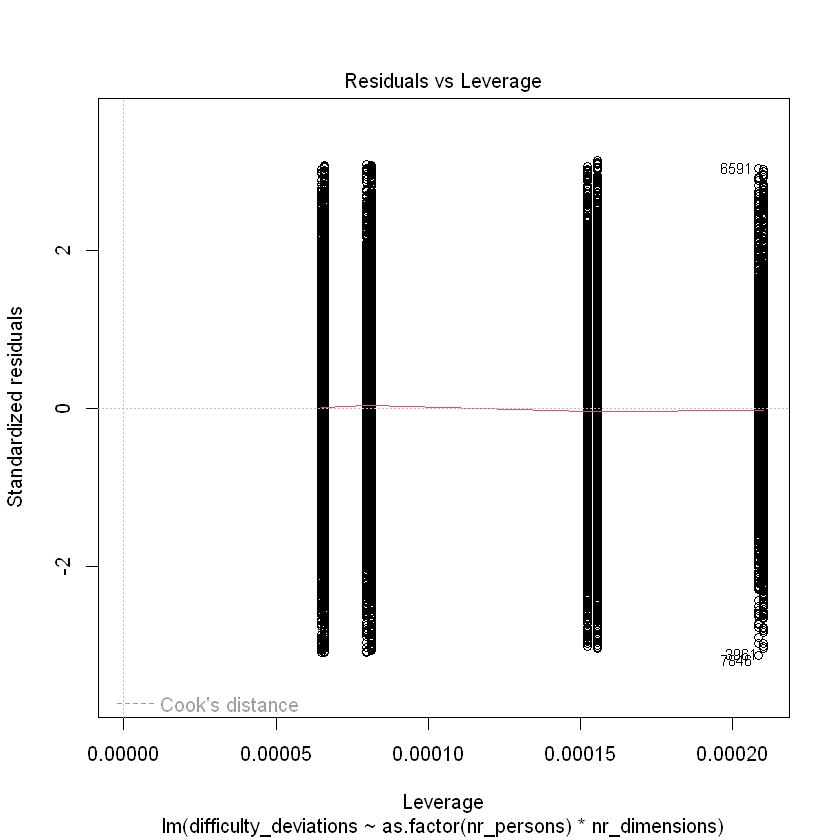

In [126]:
plot(m0)

In [127]:
summary(m0)


Call:
lm(formula = difficulty_deviations ~ as.factor(nr_persons) * 
    nr_dimensions, data = beta_results_without_outliers)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.89511 -0.17477 -0.00054  0.17696  0.89909 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                             0.029608   0.005522   5.362 8.28e-08
as.factor(nr_persons)300               -0.008710   0.007792  -1.118    0.264
nr_dimensions                          -0.008266   0.001552  -5.326 1.01e-07
as.factor(nr_persons)300:nr_dimensions  0.003533   0.002188   1.615    0.106
                                          
(Intercept)                            ***
as.factor(nr_persons)300                  
nr_dimensions                          ***
as.factor(nr_persons)300:nr_dimensions    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.287 on 31356 degrees of freedom
Multiple R-squared:  0.00122

We see the following:
* Since the intercept is positive, a negative coefficient corresponds to an improvement in estimation accuracy (as long as it does not overshoot)
* There are no significant improvements of the accuracy for more persons.

However, the model should not be trusted blindly, it is not particularly good.

In [128]:
m1 <- mgcv::gam(
    difficulty_deviations  ~
    s(nr_dimensions, by=nr_persons, k=4), 
    data=beta_results_without_outliers
)


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 5 iterations.
The RMS GCV score gradient at convergence was 7.63602e-08 .
The Hessian was positive definite.
Model rank =  5 / 5 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                             k' edf k-index p-value
s(nr_dimensions):nr_persons 4.0 3.9    0.99    0.22


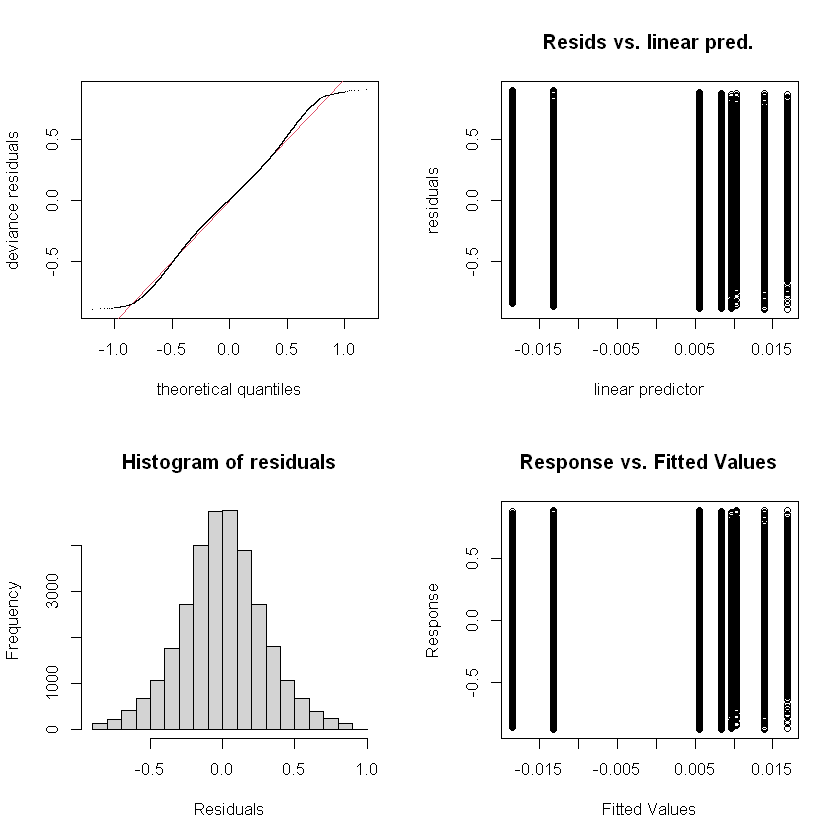

In [129]:
gam.check(m1)

In [130]:
summary(m1)


Family: gaussian 
Link function: identity 

Formula:
difficulty_deviations ~ s(nr_dimensions, by = nr_persons, k = 4)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.002529   0.008275  -0.306     0.76

Approximate significance of smooth terms:
                              edf Ref.df     F p-value    
s(nr_dimensions):nr_persons 3.896  3.991 14.44  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.0017   Deviance explained = 0.182%
GCV = 0.082345  Scale est. = 0.082332  n = 31360

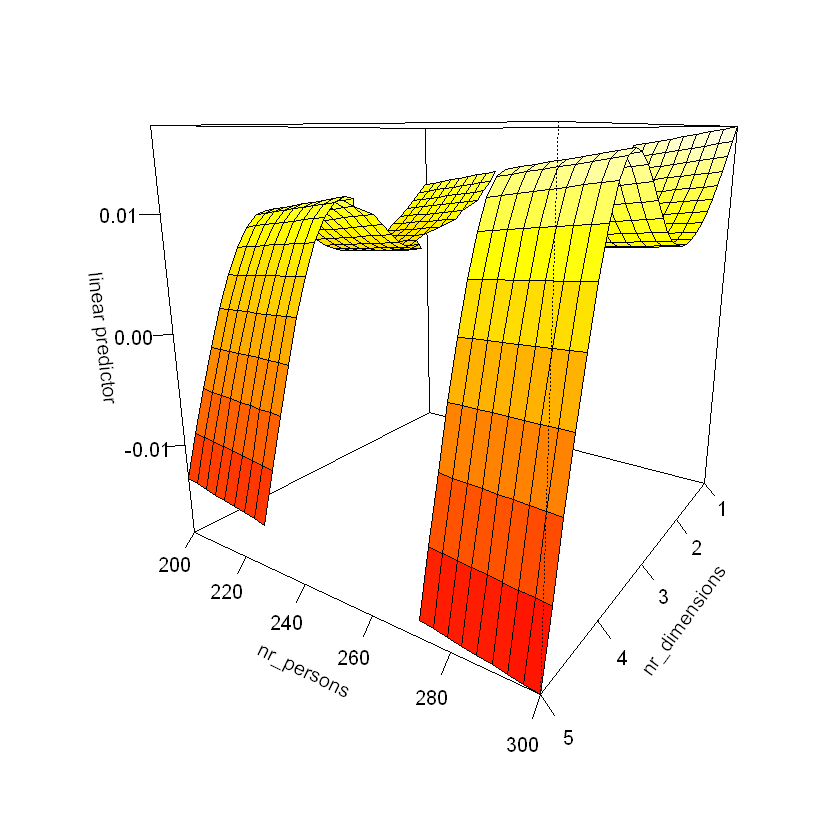

In [136]:
vis.gam(m1, theta=124, too.far = .3, ticktype="detailed")

The GAM predicts that more persons actually lead to a slightly more biased estimation.

[**back to contents**](#contents)

<a id='theta_dev'></a>
## Theta deviations

<a id='theta_dev_descriptive'></a>
### Descriptive analyses

In [138]:
theta_results %>%
  group_by(nr_persons, nr_items) %>%
  summarise(
    alpha_deviations = mean(theta_deviations),
    alpha_deviations_se = se(theta_deviations),
    aplha_deviations_sd = sd(theta_deviations)
  )

`summarise()` has grouped output by 'nr_persons'. You can override using the `.groups` argument.


nr_persons,nr_items,alpha_deviations,alpha_deviations_se,aplha_deviations_sd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
200,40,-0.001591331,0.0012550450,0.3549803
300,40,-0.003083793,0.0009971286,0.3454155


In [139]:
theta_results %>%
  group_by(nr_persons, nr_items, nr_dimensions) %>%
  summarise(
    alpha_deviations = mean(theta_deviations),
    alpha_deviations_se = se(theta_deviations),
    aplha_deviations_sd = sd(theta_deviations)
  )

`summarise()` has grouped output by 'nr_persons', 'nr_items'. You can override using the `.groups` argument.


nr_persons,nr_items,nr_dimensions,alpha_deviations,alpha_deviations_se,aplha_deviations_sd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
200,40,1,-0.005125623,0.002014764,0.2849306
200,40,3,-0.009431644,0.002685517,0.3797894
200,40,4,-0.004346137,0.002657188,0.3757831
200,40,5,0.012538079,0.002618621,0.3703289
300,40,1,-0.003749659,0.001594719,0.2762134
300,40,3,0.004867906,0.002123760,0.3678460
300,40,4,-0.008792206,0.002099865,0.3637072
300,40,5,-0.004661213,0.002107709,0.3650660


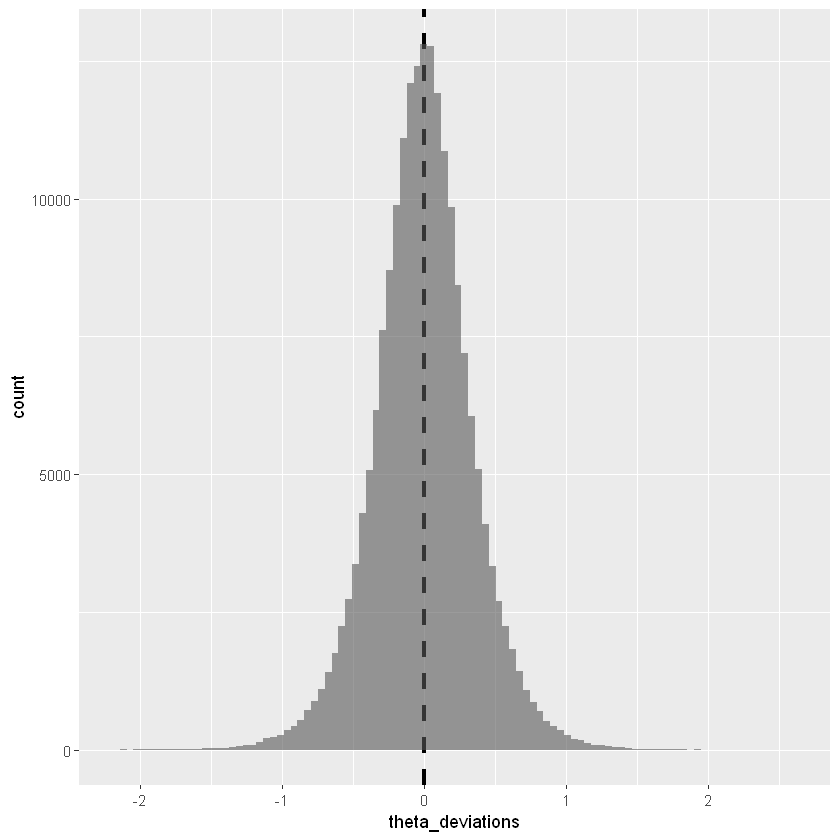

In [140]:
theta_results %>%
    ggplot(aes(x=theta_deviations)) + 
        geom_vline(xintercept=0, linetype="dashed", size=1.2) +
        geom_histogram(bins=100, alpha=.6) 

There is no highly visible skew; the errors seem to be more or less normally distributed around the true value

In [141]:
skewness(theta_results$theta_deviations)
kurtosis(theta_results$theta_deviations)

[1] -0.002765202

[1] 4.430985

Small skew to the left; more values in the tails than under normal assumption.

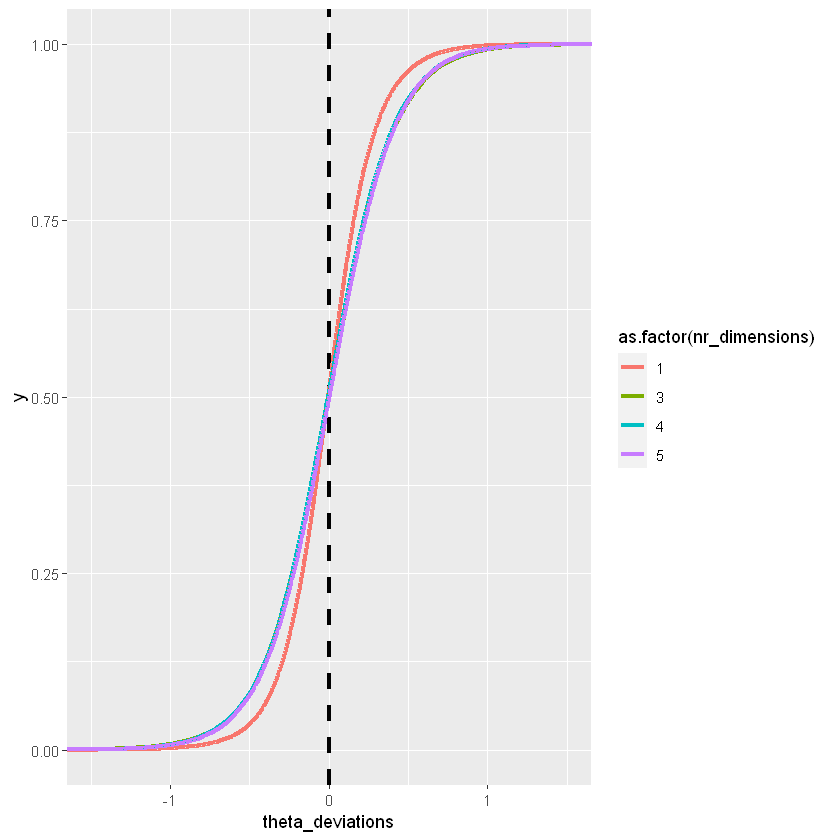

In [142]:
# Distribution
theta_results %>%
    ggplot(aes(x=theta_deviations, col=as.factor(nr_dimensions))) + 
        geom_vline(xintercept=0, linetype="dashed", size=1.2) +
        stat_ecdf(size=1.2) +
        coord_cartesian(xlim=c(-1.5, 1.5))

More dimensions lead to a little more deviations here as well.

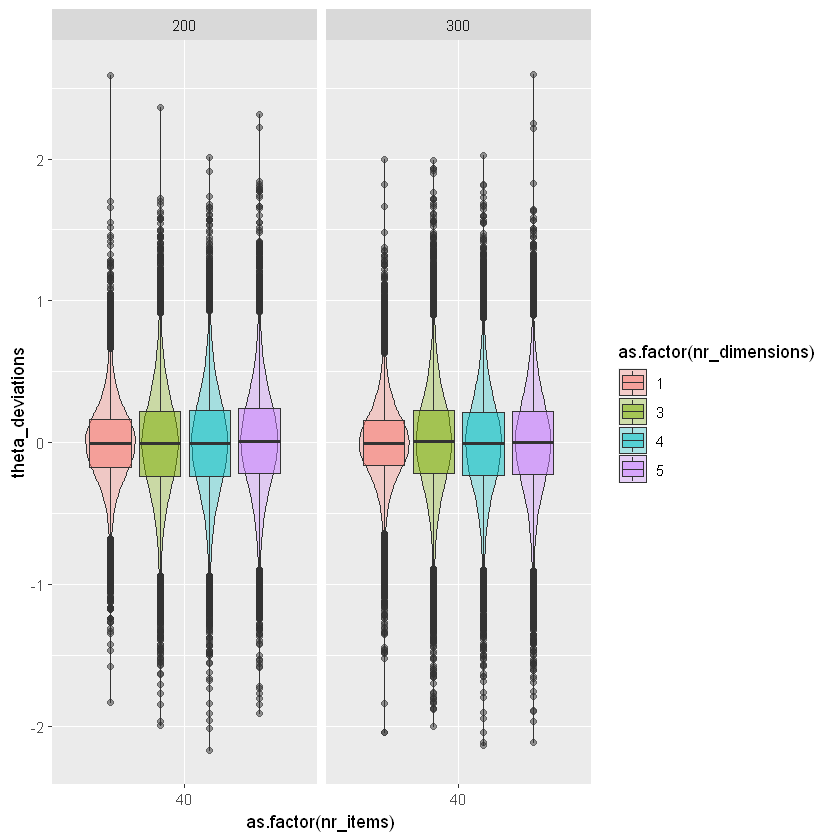

In [174]:
# Mean and SE
theta_results %>%
  ggplot(aes(x=as.factor(nr_items), y=theta_deviations, fill=as.factor(nr_dimensions))) +
    geom_violin(alpha=.3) +
    geom_boxplot(alpha=.5, position = position_dodge(.9)) +
    facet_wrap(~as.factor(nr_persons))

Here again, it looks like the estimation is more stable for one dimension, but still acceptable and not biased for more dimensions.

`summarise()` has grouped output by 'nr_persons', 'nr_items'. You can override using the `.groups` argument.


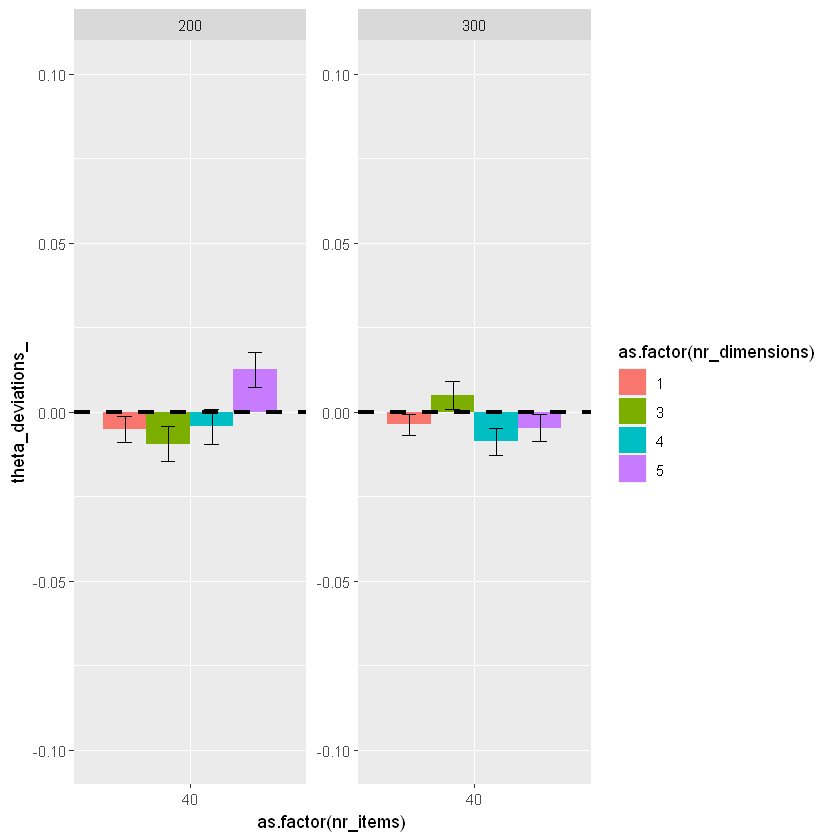

In [146]:
# Mean and SE
theta_results %>%
  group_by(nr_persons, nr_items, nr_dimensions) %>%
  summarise(
    theta_deviations_ = mean(theta_deviations),
    theta_deviations_se = se(theta_deviations)
  ) %>% 
  ggplot(aes(x=as.factor(nr_items), y=theta_deviations_, fill=as.factor(nr_dimensions))) +
    geom_bar(stat="identity", position = position_dodge()) +
    facet_wrap(~as.factor(nr_persons), scales="free") +
    geom_errorbar(
        aes(
            x=as.factor(nr_items), 
            ymin=theta_deviations_ - 1.96 * theta_deviations_se, 
            ymax=theta_deviations_ + 1.96 * theta_deviations_se
        ), 
        width=.3,
        position=position_dodge(.9)
    ) +
    geom_hline(yintercept=0, linetype="dashed", size=1.2) +
    coord_cartesian(ylim=c(-.1, .1))

[**back to contents**](#contents)

<a id='theta_dev_stats'></a>
### Statistical analyses

**Do 200 vs. 300 people make a difference?**

In [147]:
# Does it make a difference whether we use 200 or 300 people?
t.test(
    theta_results %>% filter(nr_persons == 200) %>% select(theta_deviations),
    theta_results %>% filter(nr_persons == 300) %>% select(theta_deviations),
)


	Welch Two Sample t-test

data:  theta_results %>% filter(nr_persons == 200) %>% select(theta_deviations) and theta_results %>% filter(nr_persons == 300) %>% select(theta_deviations)
t = 0.93108, df = 168192, p-value = 0.3518
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.001649258  0.004634181
sample estimates:
   mean of x    mean of y 
-0.001591331 -0.003083793 


In [148]:
var.test(
    theta_results %>% filter(nr_persons == 200) %>% pull(theta_deviations),
    theta_results %>% filter(nr_persons == 300) %>% pull(theta_deviations),
)


	F test to compare two variances

data:  theta_results %>% filter(nr_persons == 200) %>% pull(theta_deviations) and theta_results %>% filter(nr_persons == 300) %>% pull(theta_deviations)
F = 1.0561, num df = 79999, denom df = 119999, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.042879 1.069604
sample estimates:
ratio of variances 
          1.056149 


We see that 
* the estimates are not less biased (not statistically significant)
* the estimations are more closely centered for 300 people, i.e. they have less variance around the true value

**Does the interaction of number of persons and number of dimensions make a difference?**

In [156]:
theta_results_without_outliers <- remove_outliers(theta_results, "theta_deviations", .015)

In [157]:
m0 <- lm(
    theta_deviations ~
    as.factor(nr_persons) * nr_dimensions, 
    theta_results_without_outliers
)

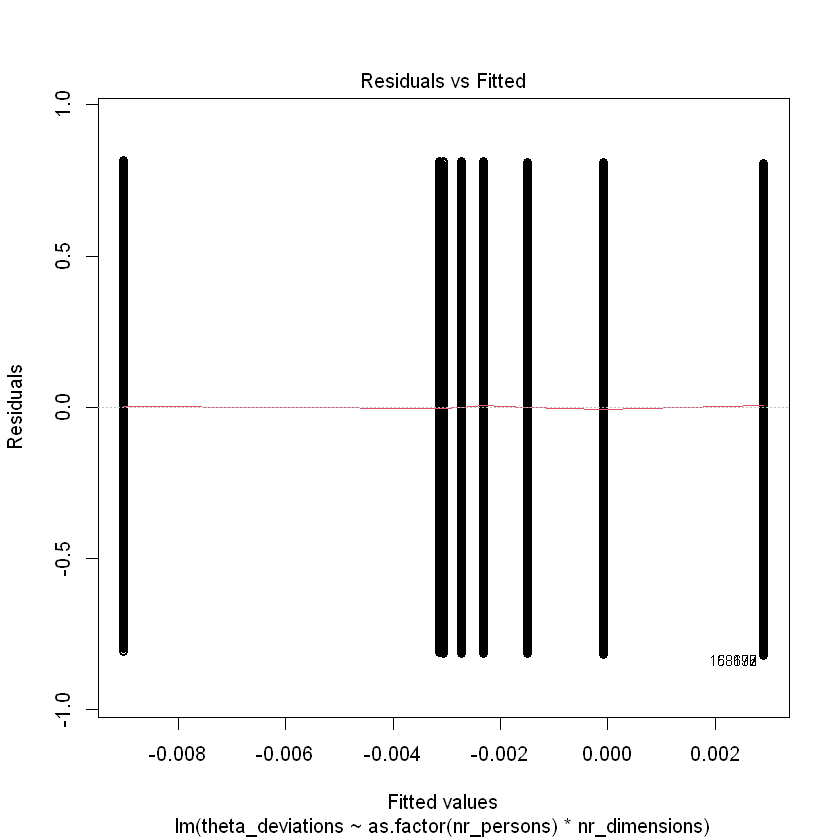

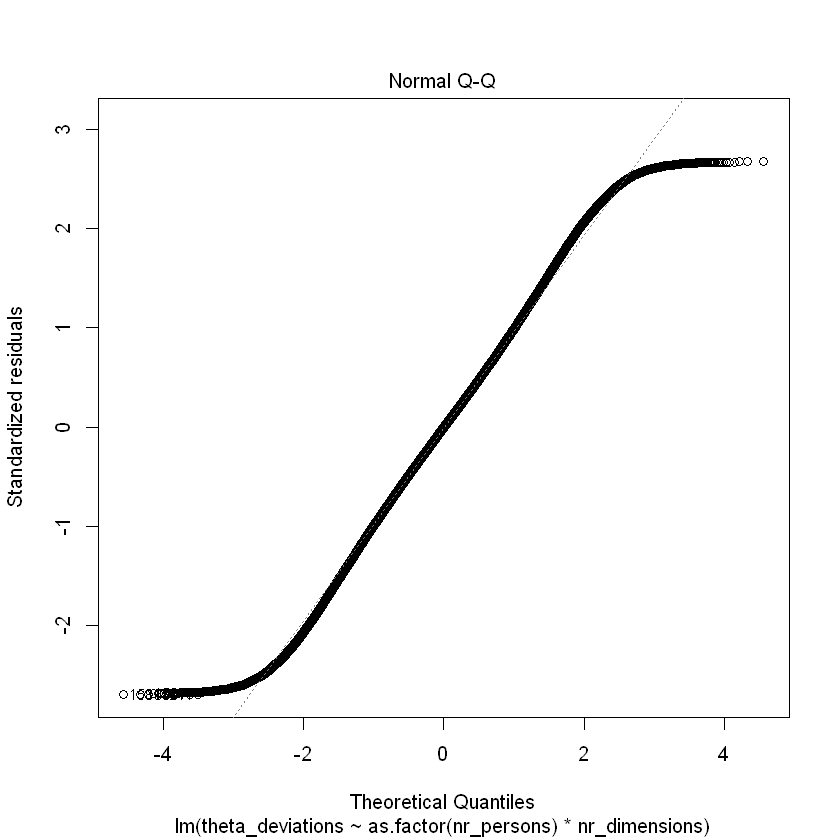

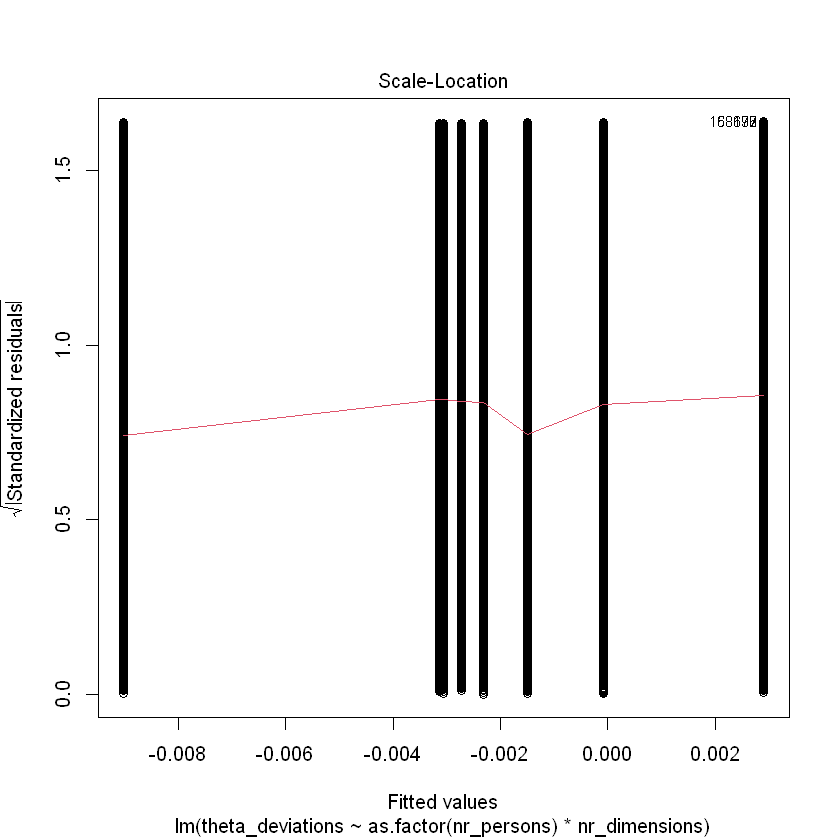

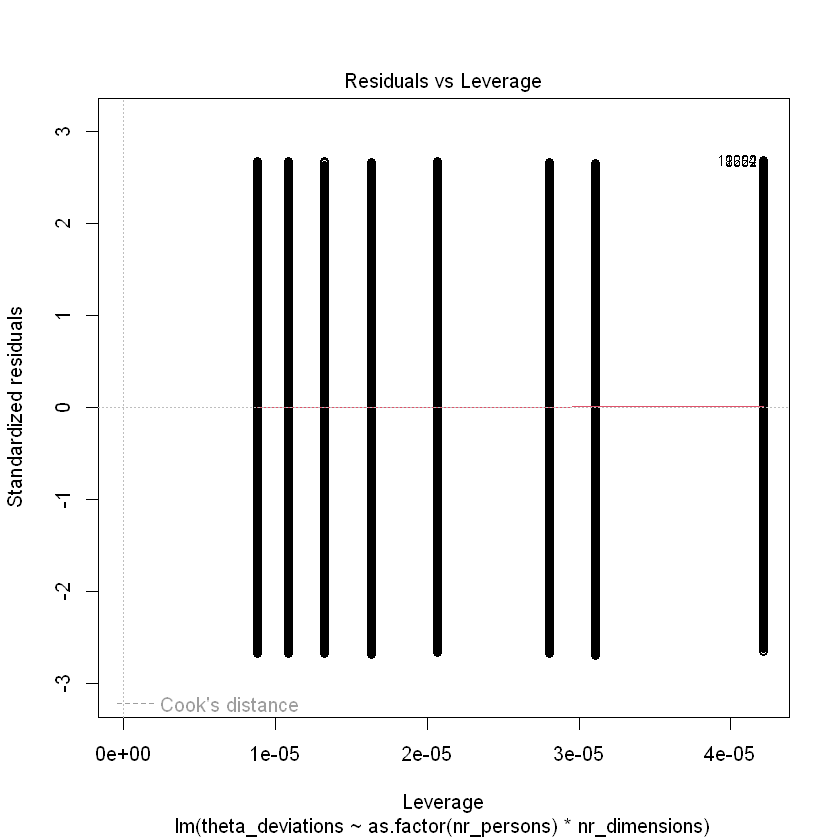

In [158]:
plot(m0)

In [159]:
summary(m0)


Call:
lm(formula = theta_deviations ~ as.factor(nr_persons) * nr_dimensions, 
    data = theta_results_without_outliers)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.81941 -0.20004  0.00022  0.19905  0.81488 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                            -0.0120037  0.0026210  -4.580 4.66e-06
as.factor(nr_persons)300                0.0109136  0.0033824   3.227 0.001253
nr_dimensions                           0.0029835  0.0007358   4.055 5.02e-05
as.factor(nr_persons)300:nr_dimensions -0.0033941  0.0009495  -3.575 0.000351
                                          
(Intercept)                            ***
as.factor(nr_persons)300               ** 
nr_dimensions                          ***
as.factor(nr_persons)300:nr_dimensions ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3042 on 193996 degrees of freedom
Multiple R-squared:  8.71

We see the following:
* Since the intercept is negative, a positive coefficient corresponds to an improvement in estimation accuracy (as long as it does not overshoot)
* 300 people lead to a less biased estimation
* An increase in the number of dimensions has a small effect in that the estimation becomes less negatively biased.
* The interaction is negative, i.e. with more dimensions and people, the estimation is biased a little towards more negative.

However, the model should not be trusted blindly, it is not particularly good.

In [169]:
m1 <- mgcv::gam(
    theta_deviations  ~
    s(nr_dimensions, by=nr_persons, k=4), 
    data=theta_results_without_outliers
)


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 7 iterations.
The RMS GCV score gradient at convergence was 1.565851e-08 .
The Hessian was positive definite.
Model rank =  5 / 5 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                              k'  edf k-index p-value
s(nr_dimensions):nr_persons 4.00 3.91    0.99    0.17


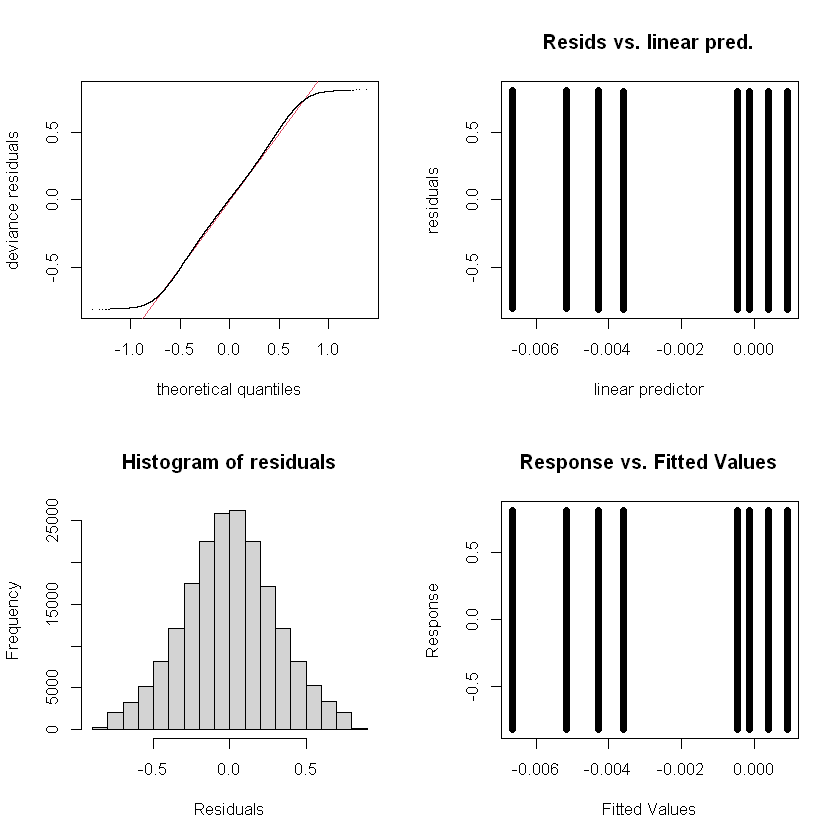

In [170]:
gam.check(m1)

In [171]:
summary(m1)


Family: gaussian 
Link function: identity 

Formula:
theta_deviations ~ s(nr_dimensions, by = nr_persons, k = 4)

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.002191   0.003732  -0.587    0.557

Approximate significance of smooth terms:
                              edf Ref.df     F p-value   
s(nr_dimensions):nr_persons 3.915  3.994 4.419 0.00155 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  7.7e-05   Deviance explained = 0.00971%
GCV = 0.092567  Scale est. = 0.092565  n = 194000

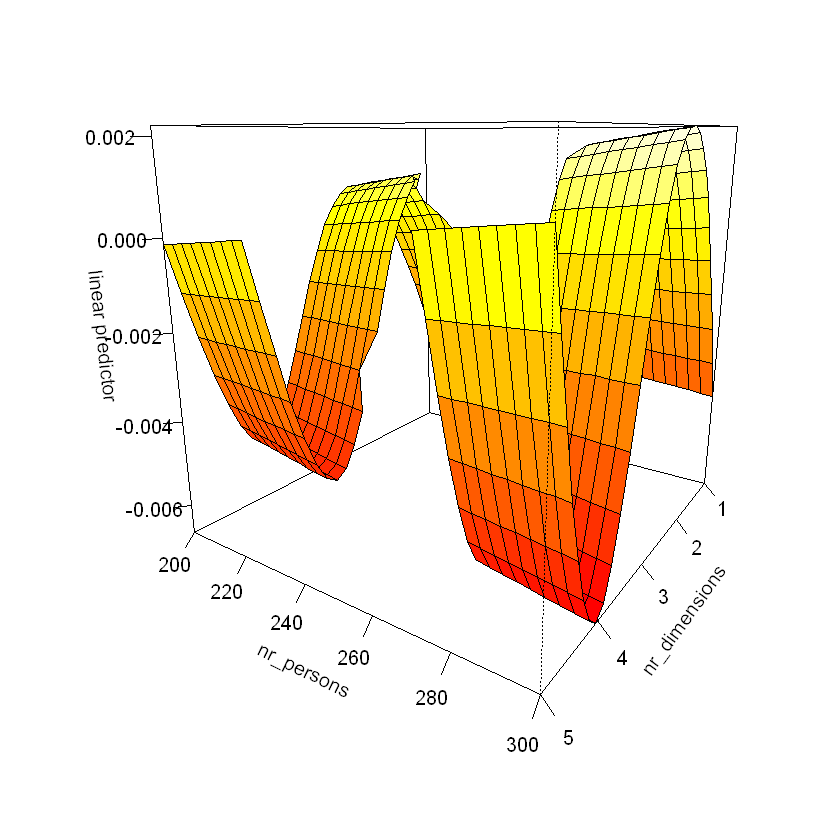

In [172]:
vis.gam(m1, theta=124, too.far = .3, ticktype="detailed")

The GAM predicts that more persons actually lead to a slightly more biased estimation.

[**back to contents**](#contents)

<a id='conclusions'></a>
## Conclusions

It looks like the following holds true for all parameters:
* **The overall bias of the parameter estimation is surprisingly low**, given the vast amount of parameters to estimate
    * This is also true for the G factor when fitting multidimensional models.
* **With 300 people compared to 200 people, there is no real visible effect on the bias of the estimation.**
    * For the theta and beta parameters, the differences are non-significant
    * For the alpha parameters, 300 people do lead to an improved, i.e. less biased estimation
* **300 people lead to more accurate estimations in that the scatter around the true values are smaller**.
    * This holds true for all three parameter types estimated in the model.
* **A unidimensional model leads to more accurate estimations (less variance) compared to a multidimensional model.**
    * This is true for all parameter types estimated.
    * That being said, the variance is still acceptable for the multidimensional models.

Therefore, the best model to choose based on these findings would be a unidimensional model with 300 persons.